Eric Nguyen

2019-02-21

# 1.02 Graded Assignment: Binomial Problems Using Two Methods

### *Solution 1*

**A.**

In [1]:
# import Pkg; Pkg.add(["Distributions", "JuMP", "NLopt", "SpecialFunctions", "Plots"])
using Distributions, Plots

In [2]:
P(n, p, x) = factorial(n) / (factorial(n - x) * factorial(x)) * p^x * (1 - p)^(n - x)
pdf(Binomial(20, 0.3), 6)

0.19163898275344257

**B.**

In [3]:
PartB = P.(20, 0.3, 0:6)

7-element Array{Float64,1}:
 0.000797922662976119
 0.006839337111223878
 0.02784587252426864 
 0.07160367220526223 
 0.13042097437387049 
 0.17886305056987956 
 0.19163898275344238 

In [4]:
sum(PartB)

0.6080098122009233

**C.**

I chose 6 as the upper bound because I am not using normal approximation. If I was using normal approximation I would have chose 6.5 to account for the error caused by the continuous nature of the normal distribution.

### *Solution 2*

This is not a binomial situation because the trials are not independent. It would be almost binomial with a population of 200 marbles because although the criteria of the binomial setting is not completely satisfied, the population size would be at least 20 times larger than the sample size.

### *Solution 3*

In [5]:
n = 25
p = 0.8
d = Binomial(n, p)
μ = mean(d)
σ = std(d)

1.9999999999999998

**A.**

This is not a binomial experiment because the probability for success of each trial is not the same. It does meet the criteria of an almost binomial situation because the population size is at least 20 times larger than than the sample size.

**B.**

In [6]:
μ

20.0

**C.**

In [7]:
x = 14
cdf(d, x)

0.005554920487474814

**D.**

1)

In [8]:
x = 13
cdf(d, x)

0.0015400514916665698

2)

Assuming that this is a good sample, I would conclude the theory that 80% of all Americans who visit doctors have problems of a psychomatic nature is true.

### *Solution 4*

Continuity correction is a method used to minimize the error produced by normal approximation to the binomial. It works because it allows continuous numbers to act as though they occupy an inclusive range, 0.5, above and below the discrete value. You use it simply by subtracting 0.5 from the lower bound and adding 0.5 to the upper bound.

### *Solution 5*

In [9]:
n = 100
p = .1
binom_d = Binomial(n, p)
μ = mean(binom_d)
σ = std(binom_d)
norm_d = Normal(μ, σ)

Normal{Float64}(μ=10.0, σ=3.0)

**A.**

Yes this can be considered an almost binomial situation because the population size is at least 25 times larger than the sample size.

**B.**

In [10]:
upper_bound = 16
lower_bound = 4
cdf(binom_d, upper_bound) - cdf(binom_d, lower_bound)

0.955690107191223

**C.**

In [11]:
n * p >= 10

true

In [12]:
n * (1 - p) >= 10

true

In [13]:
# With continuity correction
cdf(norm_d, upper_bound + 0.5) - cdf(norm_d, lower_bound - 0.5)

0.9697397199795283

In [14]:
# Without continuity correction
cdf(norm_d, upper_bound) - cdf(norm_d, lower_bound)

0.9544997361036416

The probability using continuity correction is higher than the one without. You account for the difference by adding 0.5 to the upper bound and subtracting 0.5 from the lower bound.

**D.**

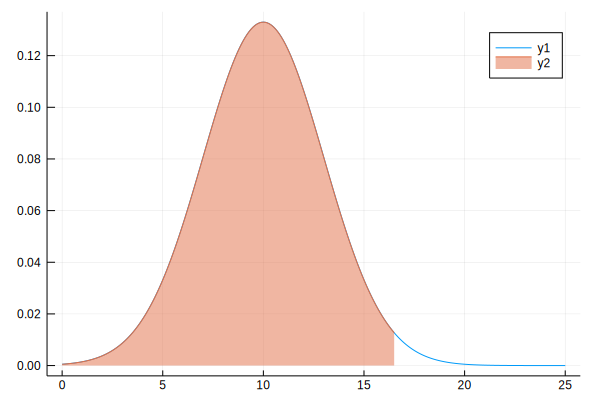

In [15]:
# Probability distribution
x_axis = 0:0.1:25
plot(x_axis, pdf.(norm_d, x_axis))

# Area using normal approximation with continuity correction
x_axis_c = 0:0.1:16.5
plot!(x_axis_c, pdf.(norm_d, x_axis_c), fill = (0, 0.5))

### *Solution 6*

In [16]:
n = 100
p = 0.75
binom_d = Binomial(n, p)
μ = mean(binom_d)
σ = std(binom_d)
norm_d = Normal(μ, σ)

Normal{Float64}(μ=75.0, σ=4.330127018922194)

In [17]:
σ

4.330127018922194

**A.**

The random variable $X$ does have a binomial distribution as it fulfills the four characteristics for the binomial distribution.

The values, $n$, $p$, $\mu$ and $\sigma$ are as follows:
$$\begin{align}
n &= 100 \\
p &= 0.75 \\
\mu &= 75 \\
\sigma &\approx 4.33
\end{align}$$

**B.**

In [18]:
x = 79
cdf(binom_d, x)

0.8511689495570083

**C.**

In [19]:
n * p >= 10

true

In [20]:
n * (1 - p) >= 10

true

It is appropriate to use the normal approximation to the binomial probability for this problem because the conditions $np \geq 10$ and $n(1 - p) \geq 10$ both evaluate to true.

**D.**

In [21]:
upper_bound = 100
lower_bound = 80
cdf(norm_d, upper_bound + 0.5) - cdf(norm_d, lower_bound - 0.5)

0.1493487760544675

In [22]:
x = [79.5, 100.5]
@. (x - μ) / σ

2-element Array{Float64,1}:
 1.0392304845413263
 5.888972745734182 

The x-values involved are 79.5 to 100.5. The z-values involved are 1.039 and 5.889. There is nothing to compare between the answers from part C and part D.